Here i will begin the EDA. I will utilize seaborn, pandas and matplotlib. 

In [2]:
import pandas as pd 
import seaborn as sns

In [10]:
df = pd.read_csv("../data/plant_disease_dataset.csv")

In [21]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   temperature      10000 non-null  float64
 1   humidity         10000 non-null  float64
 2   rainfall         10000 non-null  float64
 3   soil_pH          10000 non-null  float64
 4   disease_present  10000 non-null  int64  
dtypes: float64(4), int64(1)
memory usage: 390.8 KB


In [26]:
df['temperature'] = (df['temperature'] * (9/5) ) + 32

Creating histograms of each variable with the target variable as the hue. Using 'stat=density' to ensure the normalization of 'disease_present'. Why? Helps reflect relative likelihood.

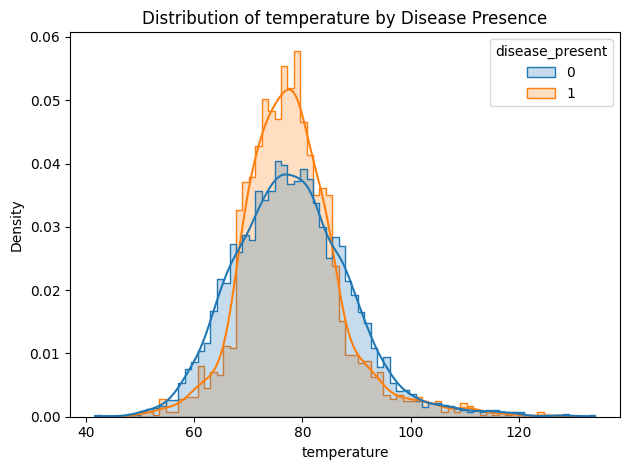

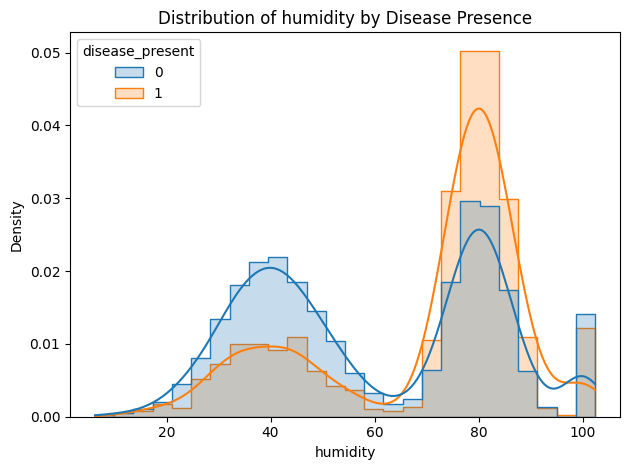

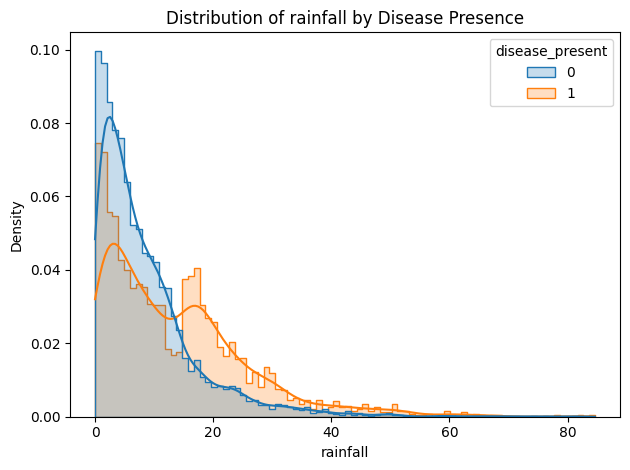

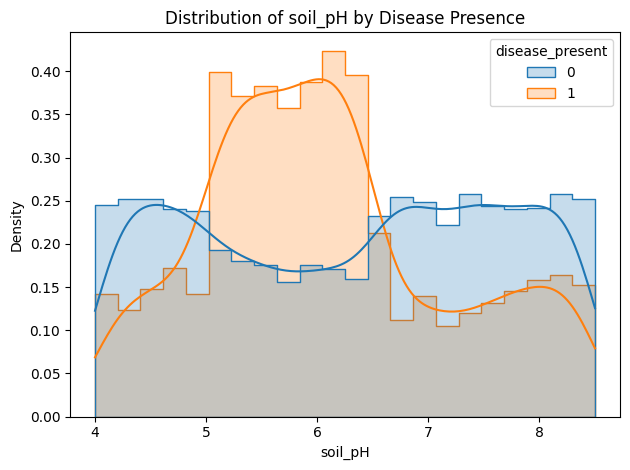

In [63]:
for col in df.select_dtypes(include='number').columns[:-1]:  # exclude 'disease_present' if it's last
    sns.histplot(data=df, x=col, hue='disease_present', kde=True, element='step', stat='density', common_norm=False)
    plt.title(f'Distribution of {col} by Disease Presence')
    plt.xlabel(col)
    plt.ylabel('Density')
    plt.tight_layout()
    plt.show()

#   stat='density' normalizes the histogram so that:
#	•	The area under the curve sums to 1, not the bar heights.
#	•	Y-axis = probability density, not raw counts.

Thanks to our quick graphs. We can enfer that the PH may be the largest indicator on whether a plant is diseased or not. But, is there a correlation between the PH and other variables?